In [6]:
import sys
sys.path.insert(0, "../python")

from propagation import laser
from ionization import ionization
from ionization import adk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import integrate

In [15]:
# Test of a axicon lens
Nx = 2**10
X = 8000
x = np.linspace(-X/2, X/2, Nx, False)
Ny = 2**8
Y = X
y = np.linspace(-Y/2, Y/2, Ny, False)
# z after lens
Nz2 = 2**8
Z2 = 1e6
z2 = np.linspace(0, Z2, Nz2)
# z before lens
Nz1 = int(Nz2/8)
Z1 = Z2/8
z1 = np.linspace(0, Z1, Nz1)

w0 = 2e3
Emax = ionization.field_from_intensity(0.1)
E0 = Emax * np.exp(-(np.reshape(x, (Nx, 1))**2 + np.reshape(y, (1, Ny))**2) / w0**2)

E1 = laser.fourier_prop2(E0, x, y, z1, 1)

alpha = np.radians(0.5)
El = E1[Nz1-1,:] * np.exp(-1j*np.pi*alpha*np.sqrt(np.reshape(x, (Nx, 1))**2 + np.reshape(y, (1, Ny))**2))
E2 = laser.fourier_prop2(El, x, y, z2, 1)

E = np.concatenate((E1, E2[1:, :]))
Z = np.concatenate((z1, z2[1:]+z1[Nz1-1]))

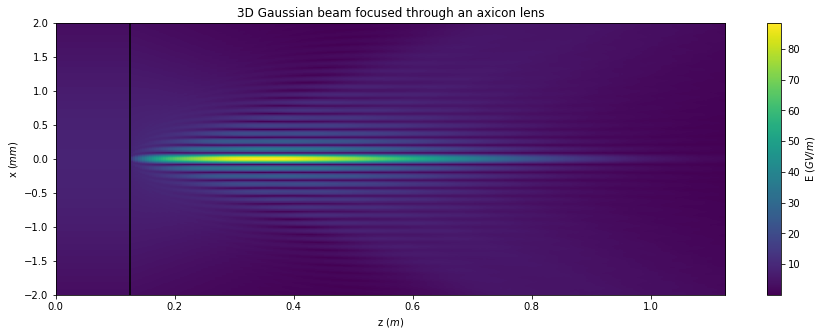

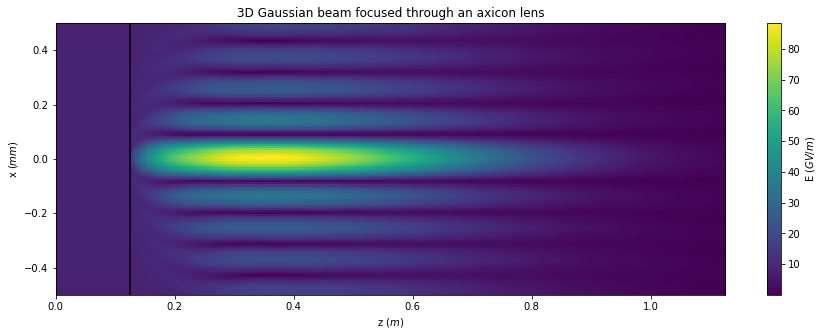

In [16]:
plt.figure(figsize=(15, 5))
plt.imshow(np.flipud(np.transpose(abs(E[:, :, int(Ny/2)]))), aspect='auto', extent=[0, (Z1+Z2)/1e6, -X/2e3, X/2e3])
plt.plot([Z1/1e6, Z1/1e6],[-X/2e3, X/2e3],'k-')
cb = plt.colorbar()
cb.set_label(r'E ($GV/m$)')
plt.xlabel(r'z ($m$)')
plt.ylabel(r'x ($mm$)')
plt.title('3D Gaussian beam focused through an axicon lens')
plt.xlim([0, (Z1+Z2)/1e6])
plt.ylim([-2, 2])
plt.show()

plt.figure(figsize=(15, 5))
plt.imshow(np.flipud(np.transpose(abs(E[:, :, int(Ny/2)]))), aspect='auto', extent=[0, (Z1+Z2)/1e6, -X/2e3, X/2e3])
plt.plot([Z1/1e6, Z1/1e6],[-X/2e3, X/2e3],'k-')
cb = plt.colorbar()
cb.set_label(r'E ($GV/m$)')
plt.xlabel(r'z ($m$)')
plt.ylabel(r'x ($mm$)')
plt.title('3D Gaussian beam focused through an axicon lens')
plt.xlim([0, (Z1+Z2)/1e6])
plt.ylim([-0.5, 0.5])
plt.show()

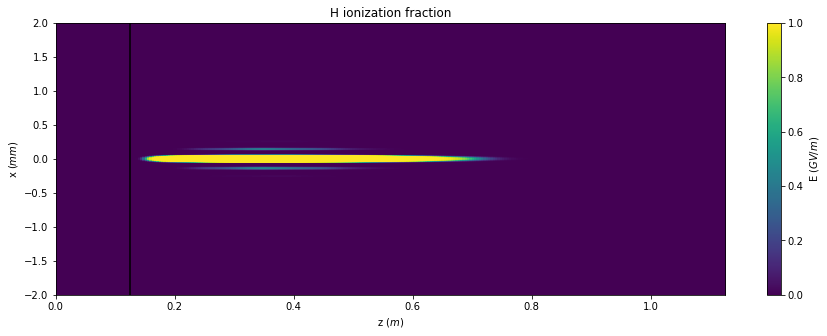

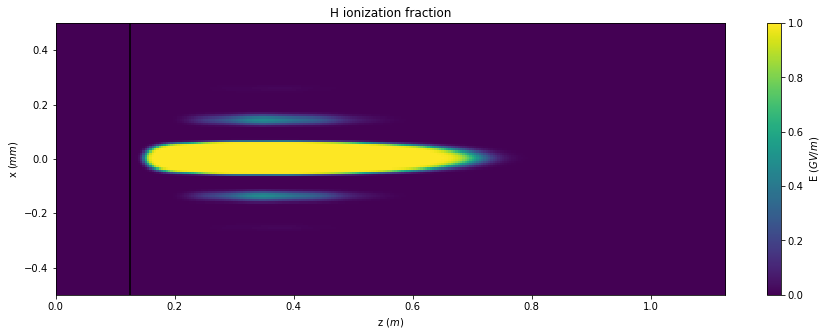

In [17]:
tau = 35.0
frac = adk.gaussian_frac(13.5984, abs(E), tau, 1)

plt.figure(figsize=(15, 5))
plt.imshow(np.flipud(np.transpose(frac[:, :, int(Ny/2)])), aspect='auto', extent=[0, (Z1+Z2)/1e6, -X/2e3, X/2e3])
plt.plot([Z1/1e6, Z1/1e6],[-X/2e3, X/2e3],'k-')
cb = plt.colorbar()
cb.set_label(r'E ($GV/m$)')
plt.xlabel(r'z ($m$)')
plt.ylabel(r'x ($mm$)')
plt.title('H ionization fraction')
plt.xlim([0, (Z1+Z2)/1e6])
plt.ylim([-2, 2])
plt.show()

plt.figure(figsize=(15, 5))
plt.imshow(np.flipud(np.transpose(frac[:, :, int(Ny/2)])), aspect='auto', extent=[0, (Z1+Z2)/1e6, -X/2e3, X/2e3])
plt.plot([Z1/1e6, Z1/1e6],[-X/2e3, X/2e3],'k-')
cb = plt.colorbar()
cb.set_label(r'E ($GV/m$)')
plt.xlabel(r'z ($m$)')
plt.ylabel(r'x ($mm$)')
plt.title('H ionization fraction')
plt.xlim([0, (Z1+Z2)/1e6])
plt.ylim([-0.5, 0.5])
plt.show()